# Lab 1: DC Measurements
ENGR 228\
Bob Smith (partner: Alice Jones)

## Introduction

A short paragraph which explains what the lab was about.

## 1. Resistance measurements

What's this about?

| Resistor ID | Nominal Value ($\Omega$) | Measured Value ($\Omega$) | Percent Error (%) |
| ---         | ---                      | ---                       | ---               |
| $R_1$       | 330                      | 351.8                     | 6.606             |
| $R_2$       | 470                      | 472.2                     | 0.468             |
| $R_3$       | 1000                     | 988.3                     | -1.170            |


In [66]:
# Importing these packages lets us do everything we want in the code blocks below.
# NumPy is a matrix-based calculation package a lot like MATLAB.
# Matplotlib is a graphing and visualization toolkit (sort of like the plotting functionality of MATLAB).
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})

Rnom = np.array([330, 470, 1000])           # nominal resistances
Rmeas = np.array([351.8, 472.2, 988.3])     # measured resistances

# calculate and print the percentage errors
print("% errors between measured and nominal resistances = {}".format(100*(Rmeas - Rnom)/Rnom))

% errors between measured and nominal resistances = [ 6.60606061  0.46808511 -1.17      ]


What are we doing here?

| Resistor Configuration | Calculated Value ($\Omega$) | Measured value ($\Omega$) | Percent Error (%) |
| ---                    | ---                         | ---                       | ---               |
| $R_1 \parallel R_2$    | 201.6                       |                           |                   |
| $R_1 \parallel R_3$    |                             |                           |                   |
| $R_2 \parallel R_3$    |                             |                           |                   |
| $R_1 \parallel R_2 \parallel R_3$ |                  |                           |                   |


In [15]:
RCcalc = np.zeros(5)  # make an array with five zeros

# Calculate the expected resistance of each resistor configuration.  Note that we are
# using the *measured* values (Rmeas) because now that we know them, they give us the
# best predictions.
RCcalc[0] = 1/((1/Rmeas[0])+(1/Rmeas[1]))    # R1 and R2 in parallel
RCcalc[1] = 0  # replace with correct formula
RCcalc[2] = 0  # replace with correct formula
RCcalc[3] = 0  # replace with correct formula
RCcalc[4] = 0  # replace with correct formula

print(RCcalc)

# Put the measured resistance for each resistor configuration here.
RCmeas = np.array([0, 0, 0, 0, 0])

print(100*(RCmeas - RCcalc)/RCcalc)

[201.6018932   0.          0.          0.          0.       ]
[-100.   nan   nan   nan   nan]


C:\Users\mark\AppData\Local\Temp\ipykernel_3336\3672763361.py:17: RuntimeWarning: invalid value encountered in true_divide
  print(100*(RCmeas - RCcalc)/RCcalc)


Comments?  What do the results tell us?



## 2. Verification of Ohm's Law

What's this about?  How did we get the data below?
   
| $v_2$ (V) | Measured $i_2$ (mA) | Calculated $i_2$ (mA) | Percent Error (%) |
| ---       | ---                 | ---                   | ---               |
| 0.3       |                     |                       |                   |
| 0.6       |                     |                       |                   |
| 0.9       |                     |                       |                   |
| 1.2       |                     |                       |                   |
| 1.5       |                     |                       |                   |
| 1.8       |                     |                       |                   |
| 2.1       |                     |                       |                   |
| 2.4       |                     |                       |                   |
| 2.7       |                     |                       |                   |
| 3.0       |                     |                       |                   |
| 3.3       |                     |                       |                   |
| 3.6       |                     |                       |                   |


Calculated i2 values = 0
% errors between measured and calculated i2 = [inf inf inf inf inf inf inf inf inf inf inf inf]
rsquared = [0.99798427] for the linear least-squares fit


C:\Users\mark\AppData\Local\Temp\ipykernel_3336\3492486466.py:34: RuntimeWarning: divide by zero encountered in true_divide
  print("% errors between measured and calculated i2 = {}".format(100*(i2meas - i2calc)/i2calc))


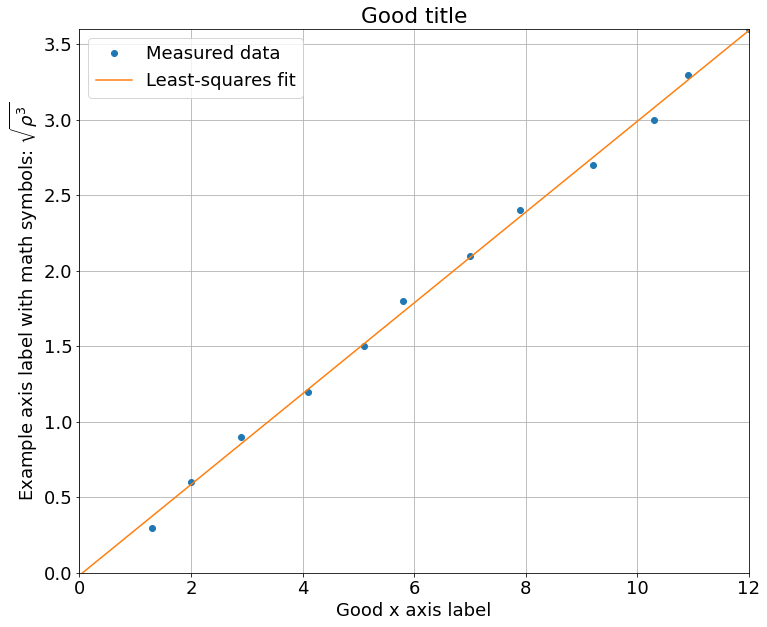

In [57]:
# Voltage across R2
v2 = np.array([0.3,
               0.6,
               0.9,
               1.2,
               1.5,
               1.8,
               2.1,
               2.4,
               2.7,
               3.0,
               3.3,
               3.6])

# Measured current in R2
i2meas = np.array([1.3,
                   2.0,
                   2.9,
                   4.1,
                   5.1,
                   5.8,
                   7.0,
                   7.9,
                   9.2,
                   10.3,
                   10.9,
                   12])

# Calculated current in R2 (using measured resistance of R2)
i2calc = 0  # fix me!

# Print the calculated i2 values and the percent error
print("Calculated i2 values = {}".format(i2calc))
print("% errors between measured and calculated i2 = {}".format(100*(i2meas - i2calc)/i2calc))


# Perform a linear least-squares fit to the (i2,v2) measured data.  We do this because
# we expect that (i2,v2) will follow a linear relation, and any deviations from a perfect
# line are presumably due to error/noise.
#
# This code is taken from the numpy documentation for "lstsq":
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
N = len(v2)  # number of data points
A = np.vstack( [ i2meas, np.ones(N) ] ).T
result = np.linalg.lstsq(A, v2, rcond=None)
(m, b) = result[0]  # m is the slope and b is the y-intercept
rsquared = 1 - result[1] / (N * v2.var())

print("rsquared = {} for the linear least-squares fit".format(rsquared))

# Make a line from the slope and y-intercept we found above
x = np.linspace(0, np.max(i2meas), num=100)   # array of 100 evenly spaced x values
y = m*x + b


# Make our plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,10))     # create the axis
ax1.plot(i2meas, v2, 'o', label=r"Measured data")  # plot the raw data points as points
ax1.plot(x, y, label=r"Least-squares fit")         # plot the linear fit as a line
ax1.set_xlim(0,12)   # change as appropriate to your data
ax1.set_ylim(0,3.6)
ax1.grid()
ax1.set_xlabel(r"Good x axis label")
ax1.set_ylabel(r"Example axis label with math symbols: $\sqrt{\rho^3}$")
ax1.set_title(r"Good title")
plt.legend(loc='upper left')  # make a legend using the "label" text of each plot cmd
plt.show()

Comments?  What do the results tell us?



## 3. Measuring the iv curve of an unknown circuit element

What's this about?  How did we get the data below?
   
| $v_x$ (V) || $i_x$ (mA) |
| ---       || ---        |
|           || 0.05       |
|           || 0.1        |
|           || 0.2        |
|           || 0.4        |
|           || 0.8        |
|           || 1.6        |
|           || 3.2        |
|           || 6.4        |
|           || 12         |
|           || 16         |


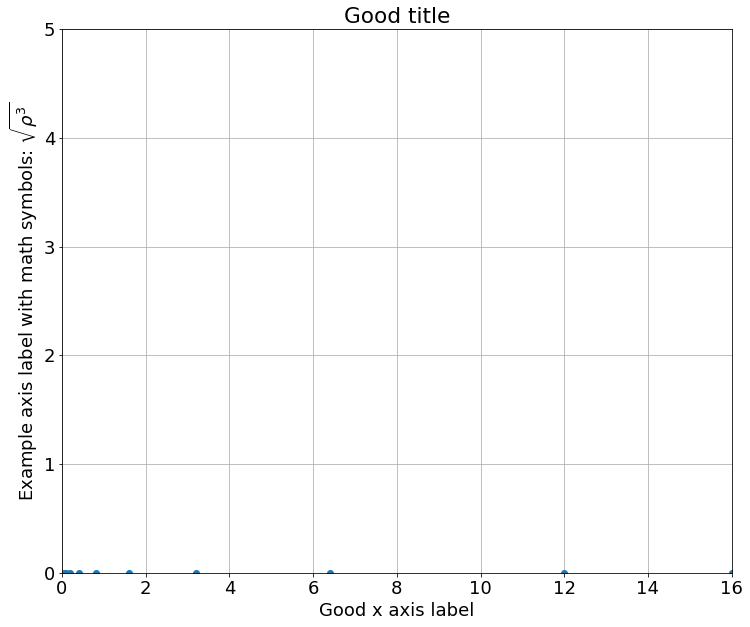

In [62]:
# Voltage across mystery element
vx = np.array([0,
               0,
               0,
               0,
               0,
               0,
               0,
               0,
               0,
               0])

# Measured current in mystery element
ix = np.array([0.05,
               0.1,
               0.2,
               0.4,
               0.8,
               1.6,
               3.2,
               6.4,
               12,
               16])

# Make our plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,10))     # create the axis
ax1.plot(ix, vx, 'o')  # plot the raw data points as points
ax1.set_xlim(0,16)     # change as appropriate to your data
ax1.set_ylim(0,5)
ax1.grid()
ax1.set_xlabel(r"Good x axis label")
ax1.set_ylabel(r"Example axis label with math symbols: $\sqrt{\rho^3}$")
ax1.set_title(r"Good title")
plt.show()

Observations?  Consider the questions in the lab handout.

When you are done with your report, please print it and turn it in on paper.  This is tricky because of some Jupyterlab limitations.  Recommended procedure:

1. From the File menu, select "Export Notebook as..." and choose "HTML".  This will prompt you to enter a filename.  Save the HTML file somewhere you can reach later.

2. Open the HTML file as a new tab in your browser, either by clicking on the download bar or by opening the file you saved in step 1.

3. Print to PDF using the web browser.